In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


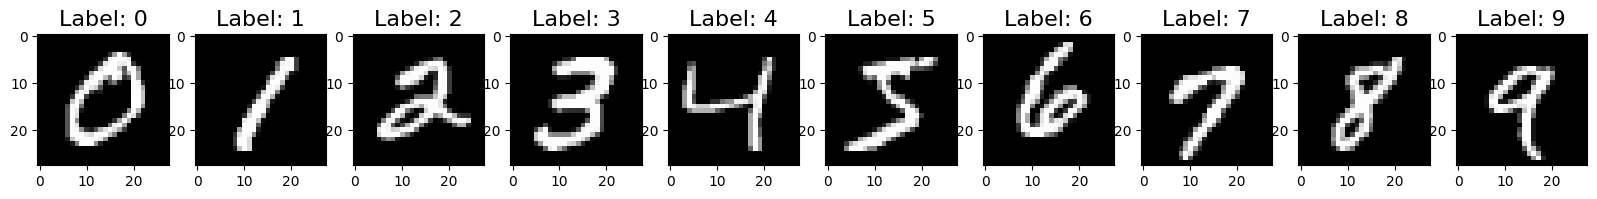

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Train

In [ ]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 13ms/step - loss: 0.5935 - accuracy: 0.8271
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2311 - accuracy: 0.9323
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1703 - accuracy: 0.9499
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1333 - accuracy: 0.9612
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1089 - accuracy: 0.9675
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0909 - accuracy: 0.9732
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0808 - accuracy: 0.9760
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0697 - accuracy: 0.9792
Epoch 9/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0619 - accuracy: 0.9813
Epoch 10/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0529 - accura

Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9769
Test Loss: 0.07802508771419525, Test Accuracy: 0.9768999814987183


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 1ms/step
[[3.5092894e-06 1.3722301e-06 3.2738248e-05 ... 9.9987197e-01
  3.0961647e-07 5.3582071e-06]
 [4.9866524e-09 1.0687053e-04 9.9988538e-01 ... 1.4946488e-08
  1.8910175e-06 1.6163242e-10]
 [8.7704183e-07 9.9896240e-01 2.2911922e-04 ... 4.1569280e-04
  2.6435446e-04 6.2883378e-06]
 ...
 [1.3788312e-10 8.0444238e-09 1.0357543e-10 ... 6.0300073e-07
  5.0450058e-07 1.6133883e-05]
 [5.5063745e-09 7.2234052e-08 1.0059309e-09 ... 2.1575255e-08
  1.3946137e-05 1.3484509e-09]
 [1.2255015e-06 1.8783209e-11 9.0643928e-09 ... 6.6302753e-12
  5.0933285e-10 4.2753200e-08]]
[7 2 1 ... 4 5 6]


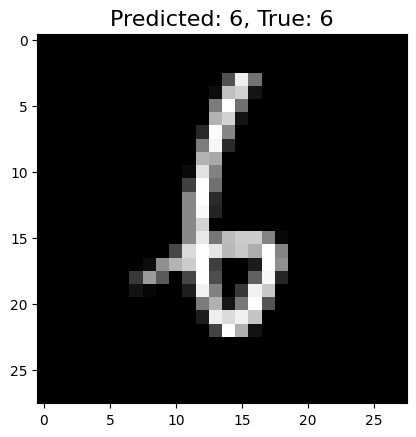

In [ ]:
# single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

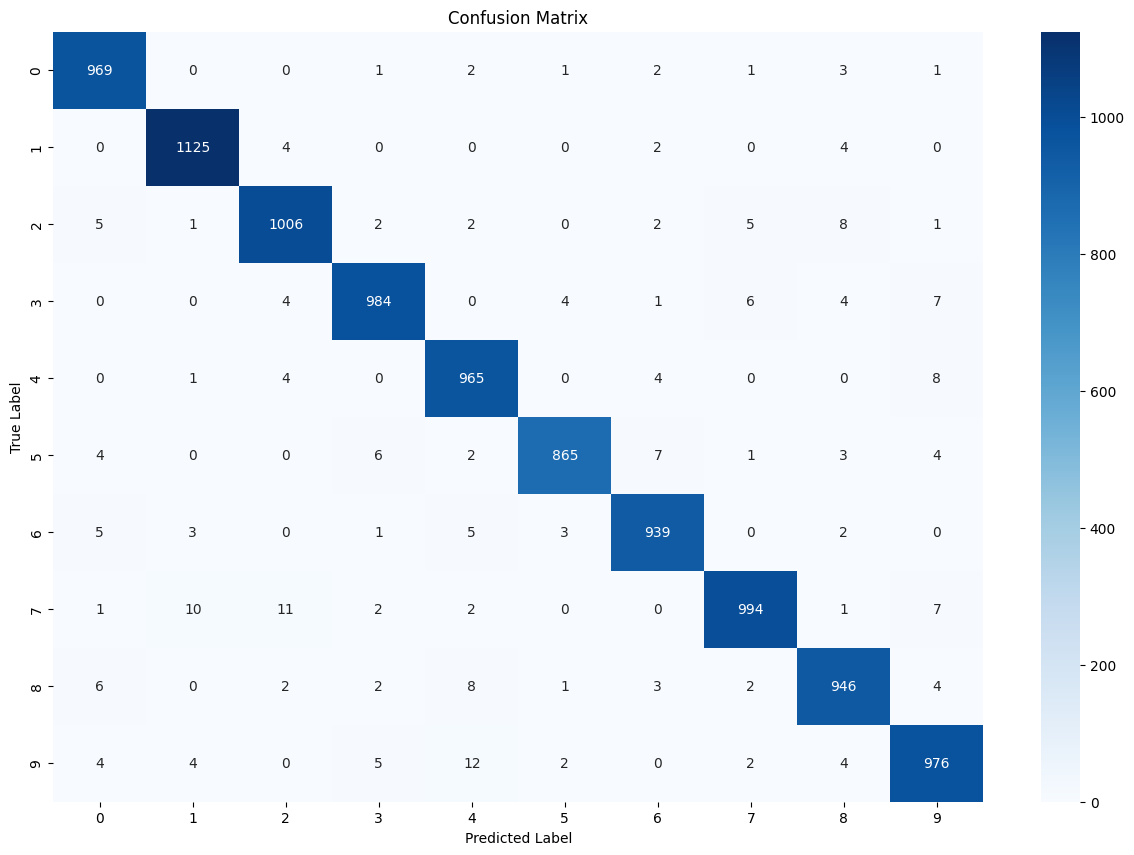

In [ ]:
# Confusion Matrix

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#PLot
fix, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [ ]:
import cv2

file = r'/content/7a.jpg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

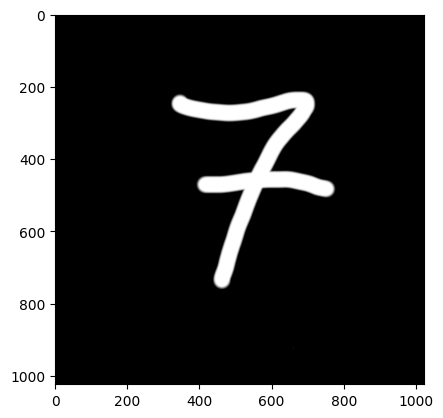

In [ ]:
plt.imshow(test_image, cmap='gray')

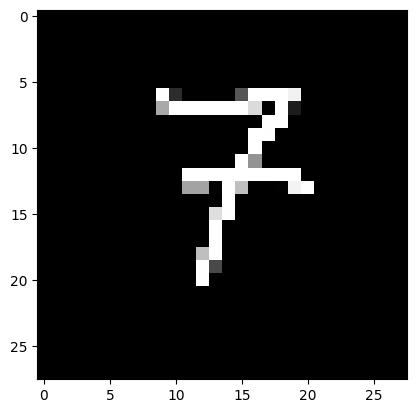

In [ ]:
img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_resized, cmap='gray')

In [ ]:
# Loading my images
my_test = np.ndarray(shape=(30,28,28))
my_labels = np.ndarray(shape=(30,))

for i in range(10):
  files = [r'/content/{}a.jpg'.format(i),r'/content/{}b.jpg'.format(i),r'/content/{}c.jpg'.format(i)]
  c = 0
  for f in files:
    idx = i*3 + c
    c += 1
    my_labels[idx] = i
    image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image,(28,28), interpolation=cv2.INTER_LINEAR)
    my_test[idx] = image_resized

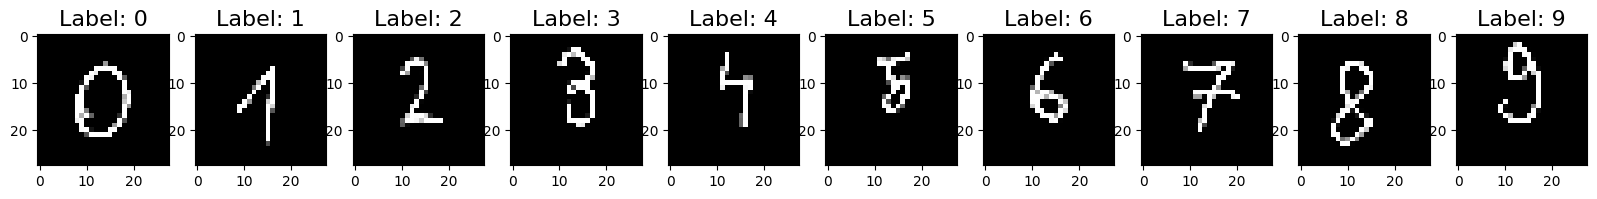

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = my_test[my_labels == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
# Normalize
my_labels = keras.utils.to_categorical(my_labels, num_classes)

# Normalize Data
my_test = my_test / 255.0

# Reshape Data
my_test = my_test.reshape(my_test.shape[0], -1)
print(my_test.shape)

(30, 784)


In [ ]:
test_loss, test_acc = model.evaluate(my_test, my_labels)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

1/1 [==============================] - 0s 44ms/step - loss: 1.5871 - accuracy: 0.6333
Test Loss: 1.587114691734314, Test Accuracy: 0.6333333253860474


In [ ]:
y_pred = model.predict(my_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

1/1 [==============================] - 0s 42ms/step
[0 0 0 4 1 1 1 2 2 3 3 3 7 4 4 9 5 9 4 6 6 9 1 7 8 8 8 2 3 8]


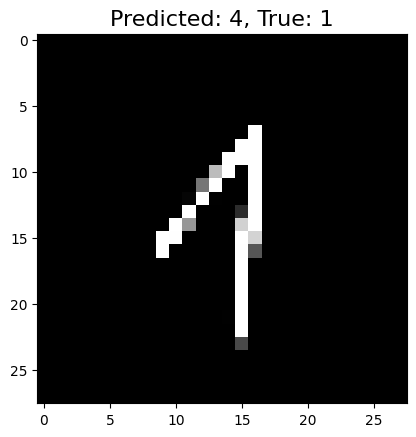

In [ ]:
# single Example
random_idx = np.random.choice(len(my_test))
x_sample = my_test[random_idx]
y_true = np.argmax(my_labels, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

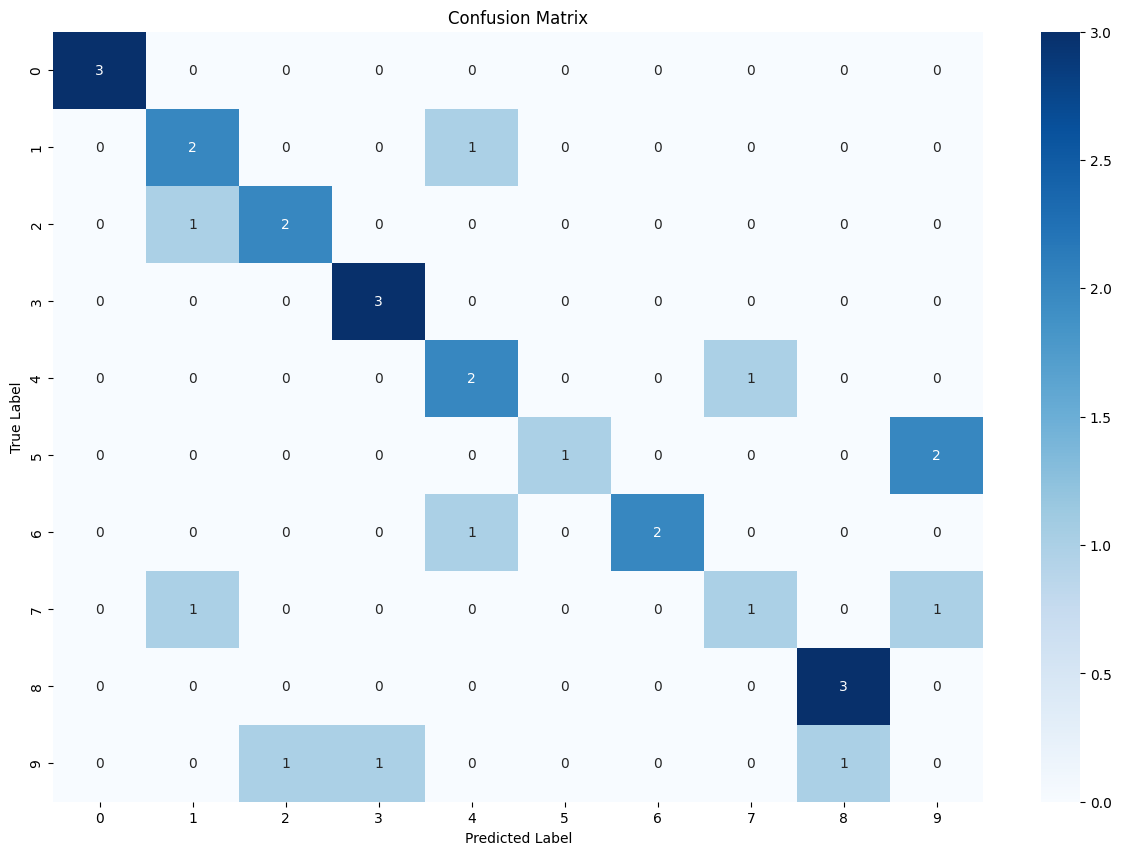

In [ ]:
# Confusion Matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fix, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

Sprawozdanie:

**Jaki współczynnik prawidłowej rozpoznawalności ma wyuczona sieć na
zbiorze testowym?**

accuracy: 0.9840 na zbiorze treningowym
accuracy: 0.9769 na zbiorze testowym


**Sprawdź jak sieć stworzona w poprzednim punkcie reaguje na twój zbiór.**

accuracy: 0.6333 na moim zbiorze

Głównym powodem o tyle niższego wyniku jest prawdopodobnie odmienny charakter pisma, np. 9 która nie została odgadnięta ani razu w zbiorach mnist jest rysowana z prostą kreską gdzie u mnie przypomina ona ogon taki jak u 3.



